In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# for building random forests
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera ML Specialization/Linear and Polynomial/Real estate.csv')
dados = dados.drop('X1 transaction date', axis=1) # Não impactava no preço (correlação quase 0)

In [4]:
dados.set_index('No', inplace = True)

In [ ]:
dados.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
"""mask = np.triu(np.ones_like(dados.corr()))
heatmap = sns.heatmap(dados.corr(), mask=mask, vmin=-1, vmax=1, annot=True)"""
"sns.pairplot(dados)"

'sns.pairplot(dados)'

## Linear and Polynomial

Melhor grau de polinomio: 6 Training MSE: 30.03 Cross Validation MSE: 64.12 Test MSE: 42.96

In [ ]:
x = dados['X3 distance to the nearest MRT station']
# x_log = np.log(dados['X3 distance to the nearest MRT station'])

y = dados['Y house price of unit area']
"sns.scatterplot(x=x_log,y=y)"
"sns.pairplot(dados)"

'sns.pairplot(dados)'

In [ ]:
# Convert 1-D arrays into 2-D because the commands later will require it
# x_log = np.expand_dims(x_log, axis=1)
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

In [ ]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

In [ ]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE: {mean_squared_error(y_train, yhat) / 2}")

training MSE: 41.24473836514911


In [ ]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 81.36384884345219


In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[9.04560600e+01 8.18229879e+03]
 [5.77961500e+02 3.34039495e+05]
 [1.70731100e+02 2.91491085e+04]
 [3.24941900e+02 1.05587238e+05]
 [1.04810100e+02 1.09851571e+04]]


In [ ]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-0.7809472  -0.42797969]
 [-0.40010017 -0.37850297]
 [-0.71823506 -0.42479618]
 [-0.59776312 -0.41319016]
 [-0.7697336  -0.42755412]]


In [ ]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 34.61103524925232
Cross validation MSE: 72.23211982955677


In [ ]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

# Plot the results
degrees=range(1,11)

<Axes: >

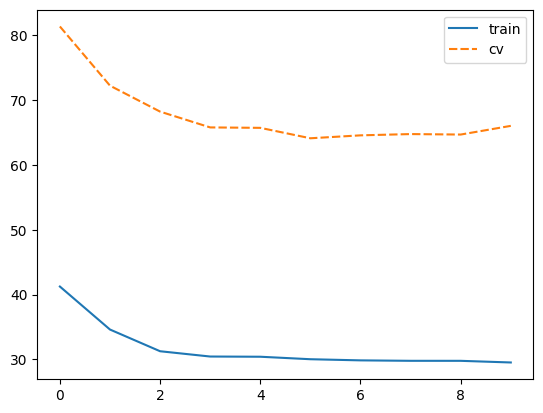

In [ ]:
sns.lineplot(pd.DataFrame({'train':train_mses, 'cv':cv_mses}))

In [ ]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=6


In [ ]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 30.03
Cross Validation MSE: 64.12
Test MSE: 42.96


Para fazer os cálculos, eu coloquei o log nos valores de x para conseguir uma relação mais linear e os resultados foram os seguintes:

Melhor grau de polinomio: 10
Training MSE: 29.39
Cross Validation MSE: 65.39
Test MSE: 44.13

Sem colocar o log:
Melhor grau de polinomio: 6
Training MSE: 30.03
Cross Validation MSE: 64.12
Test MSE: 42.96

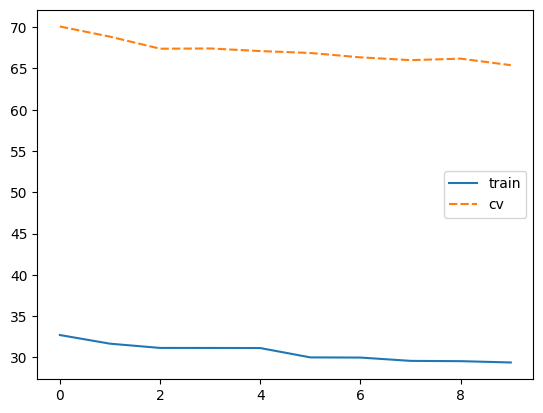

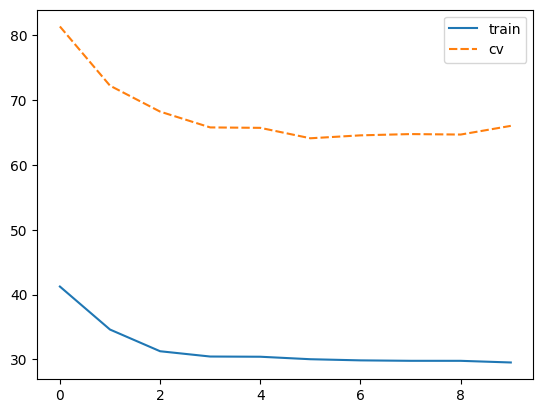

## Neural Network

Model 2:
Training MSE: 19.17
CV MSE: 54.71
Test MSE: 30.50

In [ ]:
# Data collection
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera ML Specialization/Linear and Polynomial/Real estate.csv')
dados = dados.drop('X1 transaction date', axis=1) # Nearly 0 correlation
dados.set_index('No', inplace = True)

In [ ]:
x = dados[['X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']]
y = dados['Y house price of unit area']

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

In [ ]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [ ]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [ ]:
def neural_1(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(25, activation=act_hidden, name = 'layer1'),
    Dense(15, activation=act_hidden, name = 'layer2'),
    Dense(1, activation=act_output, name = 'layer3')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

def neural_2(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(20, activation=act_hidden, name = 'layer1'),
    Dense(12, activation=act_hidden, name = 'layer2'),
    Dense(12, activation=act_hidden, name = 'layer3'),
    Dense(20, activation=act_hidden, name = 'layer4'),
    Dense(1, activation=act_output, name = 'layer5')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

def neural_3(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(32, activation=act_hidden, name = 'layer1'),
    Dense(16, activation=act_hidden, name = 'layer2'),
    Dense(8, activation=act_hidden, name = 'layer3'),
    Dense(4, activation=act_hidden, name = 'layer4'),
    Dense(12, activation=act_hidden, name = 'layer5'),
    Dense(1, activation=act_output, name = 'layer6')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

In [ ]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
model_1 = neural_1(X_train_mapped_scaled, y_train,'relu','relu','mse')
model_2 = neural_2(X_train_mapped_scaled, y_train,'relu','relu','mse')
model_3 = neural_3(X_train_mapped_scaled, y_train,'relu','relu','mse')

In [ ]:
# Loop over the the models
# Record the training MSEs
yhat_1 = model_1.predict(X_train_mapped_scaled)
train_mse_1 = mean_squared_error(y_train, yhat_1) / 2
nn_train_mses.append(train_mse_1)

# Record the cross validation MSEs
yhat_1 = model_1.predict(X_cv_mapped_scaled)
cv_mse_1 = mean_squared_error(y_cv, yhat_1) / 2
nn_cv_mses.append(cv_mse_1)

# Record the training MSEs
yhat_2 = model_2.predict(X_train_mapped_scaled)
train_mse_2 = mean_squared_error(y_train, yhat_2) / 2
nn_train_mses.append(train_mse_2)

# Record the cross validation MSEs
yhat_2 = model_2.predict(X_cv_mapped_scaled)
cv_mse_2 = mean_squared_error(y_cv, yhat_2) / 2
nn_cv_mses.append(cv_mse_2)

# Record the training MSEs
yhat_3 = model_3.predict(X_train_mapped_scaled)
train_mse_3 = mean_squared_error(y_train, yhat_3) / 2
nn_train_mses.append(train_mse_3)

# Record the cross validation MSEs
yhat_3 = model_3.predict(X_cv_mapped_scaled)
cv_mse_3 = mean_squared_error(y_cv, yhat_3) / 2
nn_cv_mses.append(cv_mse_3)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 783.57, CV MSE: 877.99
Model 2: Training MSE: 20.13, CV MSE: 55.67
Model 3: Training MSE: 783.57, CV MSE: 877.99


In [ ]:
# Select the model with the lowest CV MSE and Compute the test MSE
yhat = model_2.predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2
test_mse

3/3 [==============================] - 0s 4ms/step


30.284865107796378

In [ ]:
print(
        f"Model 2:\nTraining MSE: {nn_train_mses[1]:.2f} \n" +
        f"CV MSE: {nn_cv_mses[1]:.2f} \n"+
        f"Test MSE: {test_mse:.2f}"
)

Model 2:
Training MSE: 20.13 
CV MSE: 55.67 
Test MSE: 30.28


## Classificação Binária

Selected Model: 1
Training Set Classification Error: 0.0040
CV Set Classification Error: 0.0241
Test Set Classification Error: 0.0361

In [5]:
# To work with the same dataset, I’m going to slightly modify it and add a column
# The added column indicates whether the property has more than 5 convenience stores. This enables the use of a binary classification model

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera ML Specialization/Linear and Polynomial/Real estate.csv')
dados['5+ conv. stores'] = dados['X4 number of convenience stores'] >= 5
dados['5+ conv. stores'] = dados['5+ conv. stores'].astype(int)
dados.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,5+ conv. stores
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1


## Neural Network

In [ ]:
# Split the inputs and outputs into separate arrays
x_bc = dados[['X2 house age',	'X3 distance to the nearest MRT station',	'X5 latitude',	'X6 longitude',	'Y house price of unit area']]
y_bc = dados['5+ conv. stores']

In [ ]:
y_bc = np.expand_dims(y_bc, axis=1)

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

In [ ]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [ ]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
model_1_bc = neural_1(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))
model_2_bc = neural_2(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))
model_3_bc = neural_3(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))

In [ ]:
# Set the threshold for classification
threshold = 0.5

# Record the fraction of misclassified examples for the training set
yhat = model_1_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_1_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Record the fraction of misclassified examples for the training set
yhat = model_2_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_2_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Record the fraction of misclassified examples for the training set
yhat = model_3_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_3_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

3/3 [==============================] - 0s 4ms/step
Model 1: Training Set Classification Error: 0.00403, CV Set Classification Error: 0.02410
Model 2: Training Set Classification Error: 0.01210, CV Set Classification Error: 0.06024
Model 3: Training Set Classification Error: 0.02016, CV Set Classification Error: 0.10843


In [ ]:
# Select the model with the lowest error
model_num = 1

# Compute the test error
yhat = model_1_bc.predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

3/3 [==============================] - 0s 3ms/step
Selected Model: 1
Training Set Classification Error: 0.0040
CV Set Classification Error: 0.0241
Test Set Classification Error: 0.0361


## Decision Trees

In [6]:
dados.sample()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,5+ conv. stores
205,206,2013.083,12.8,1449.722,3,24.97289,121.51728,21.4,0


In [14]:
features = [x for x in dados.columns if x not in '5+ conv. stores']

X_train, X_val, y_train, y_val = train_test_split(dados[features], dados['5+ conv. stores'], train_size = 0.8)

In [16]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

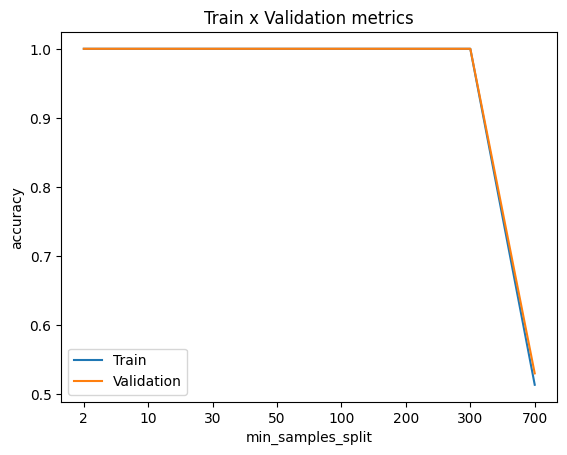

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

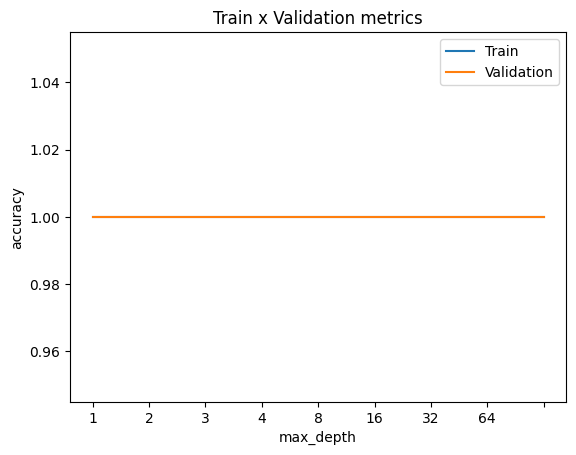

In [20]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [21]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,).fit(X_train,y_train)

In [22]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics validation:
	Accuracy score: 1.0000
